# 1.3.2 Arithmetic Operations on Images

### cv2.add(), cv2.addWeighted() etc.

In [1]:
# Image Addition

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# 일반적으로 숫자로 변수를 선언하게 되면 int형으로 선언하게 된다.
x = 250
y = 10
x + y
print(type(x))
print(type(y))

<class 'int'>
<class 'int'>


In [4]:
# unsigned(부호가 없다)로 나타낸 8비트 int형인 uint8에서는 0~255까지의 숫자만 저장이 가능하다.
# 따라서 255가 넘는 숫자를 연산할 때 오버플로우가 발생하게 된다.
# 이미지의 각 Color(BGR)값은 0~255까지의 값을 가지기 때문에 numpy의 uint8을 사용한다.

x = np.uint8([250])
y = np.uint8([10])

print(x)
print(y)

[250]
[10]


In [5]:
# uint8의 최대값인 255를 초과하였기 때문에 의도치 않은 값이 나온다.
# 250 + 10 = 260 % 256 = 4
print(x + y)

# cv2.add() --> 두 숫자를 더하지만 255값을 초과하는 값이라면 255로 고정된다.
print(cv2.add(x, y))

[4]
[[255]]


In [6]:
# Image Blending
# 같은 크기의 이미지로만 가능

In [7]:
# 이미지 두 개 불러오기
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')

# cv2.addWeighted(imgA, a, imgB, b, c)
# cv2.addWeighted(첫 번째 이미지, 가중치, 두 번째 이미지, 가중치, 결과 영상에 추가적으로 더할 값)
# result = imgA * a + imgB * b + c
dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [8]:
# cv2.getTrackbarPos() 함수의 콜백 함수
def nothing(x):
    # 현재 발생한 트랙 바의 값(x)을 반환합니다.
    # 특별한 이벤트를 처리하지 않기 때문에 함수의 반환값에 pass, return, lambda 함수로 아무 작업을 하지 않을 수 있음.
    pass

In [9]:
# 트랙바로 이미지 가중치 변경하기

# 이미지 두 개 불러오기
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')

# image로 이미지 윈도우 만들기
cv2.namedWindow('image')

# 트랙 바 생성
# cv2.createTrackbar('트랙 바 이름', '트랙 바를 생성할 창 이름', 최솟값, 최댓값, 콜백 함수)
cv2.createTrackbar('weight', 'image', 0, 255, nothing)

while(True):
    k = cv2.waitKey(1) & 0xFF
    
    if k == 27:
        break
    
    weight = cv2.getTrackbarPos('weight', 'image')
    # 가중치는 0~1 사이의 값이어야하는데 트랙 바 에서는 0~255 사이의 값을 사용하게 설정함.
    # weight 값을 255로 나누면서 0~1 사이의 값을 만들어냄
    dst = cv2.addWeighted(img1, weight / 255, img2, 1 - weight / 255, 0)
    cv2.imshow('image', dst)

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [10]:
# Bitwise Operations

In [11]:
# matplotlib으로 이미지를 띄우는 함수 여러개

# 기본적인 방법. 다만 OpenCV는 BGR 방식을 사용하기 때문에 이미지를 정확하게 볼 수 없음.
# def pltImage(img):
#     plt.imshow(img)
#     plt.xticks([]), plt.yticks([])
#     plt.show
    
# OpenCV의 BGR 방식을 cv2.cvtColor을 사용하여 BGR을 RGB로 바꾸는 과정을 거침
# def pltImage(img):
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
#     plt.show()

# 컬러 채널이 3개 존재하면 컬러 이미지이므로 컬러채널이 3개일 때는 BGR을 RGB로 바꾸는 과정을 거침
# 컬러 채널이 3개 존재하지 않으면 plt.imshow()의 컬러맵을 gray로 만듬.
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
        
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [12]:
# 이미지 두 개 불러오기
img1 = cv2.imread('cat.jpg')
img2 = cv2.imread('logo.png')

In [13]:
# 왼쪽 상단 모서리에 OpenCV 로고를 넣기위한 사전 작업
rows,cols,channels = img2.shape
# 세로 가로 채널 출력
print(rows, cols, channels)

794 600 3


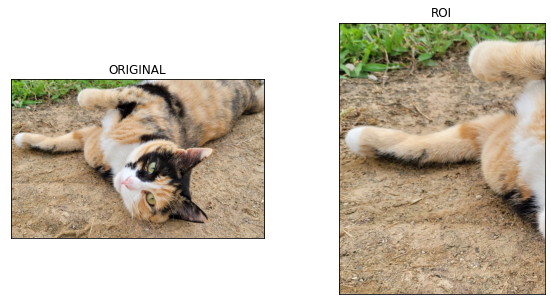

In [14]:
# img1에서 왼쪽 위를 기준으로 img2의 크기만큼 잘라낸걸 roi에 저장한다.
roi = img1[0 : rows, 0 : cols]

# pltImage(img1)
# pltImage(roi)


# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것
plt.rcParams["figure.figsize"] = (10,5)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title('ORIGINAL'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)), plt.title('ROI'), plt.xticks([]), plt.yticks([])

plt.show()

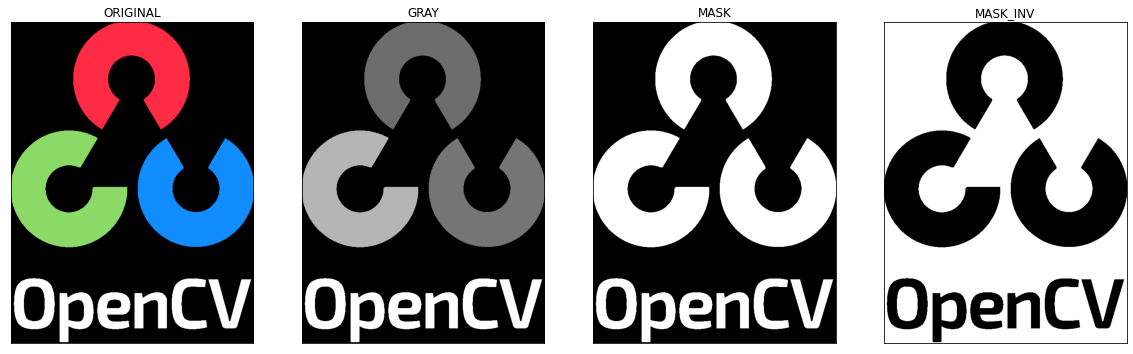

In [15]:
# 로고에 대한 마스크를 만들고 그것의 역 마스크도 만든다.

# 3채널이었던 img2에 cv2.COLOR_BGR2GRAY를 사용하여 흑백으로 만들어 마스크를 만들 준비
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# cv2.threshold()에 cv2.THRESH_BINARY 기법을 사용하여 마스크를 만듬 
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

# 연산으로 255는 0으로 0은 255로 부정 연산을 통하여 역 마스크를 만듬
mask_inv = cv2.bitwise_not(mask)

# pltImage(img2)
# pltImage(img2gray)
# pltImage(mask)
# pltImage(mask_inv)


# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것 (10, 5)
plt.rcParams["figure.figsize"] = (20,10)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
plt.subplot(141), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.title('ORIGINAL'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(img2gray, 'gray'), plt.title('GRAY'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(mask, 'gray'), plt.title('MASK'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(mask_inv, 'gray'), plt.title('MASK_INV'), plt.xticks([]), plt.yticks([])

plt.show()

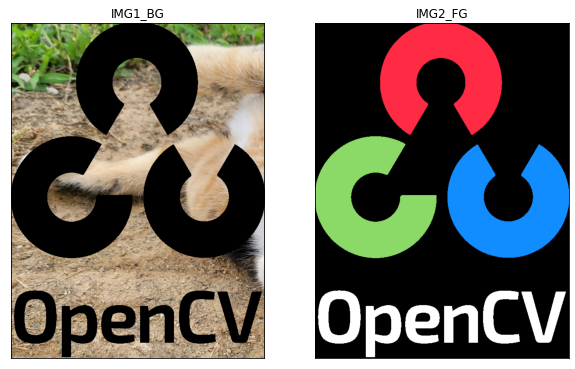

In [16]:
# ROI에서 로고 영역을 블랙아웃시켜 색이 들어갈 자리를 만든다.

# cv2.bitwise_and()으로 논리곱 연산한다.
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

# 로고 이미지에서 로고 부분만 가져온다.
img2_fg = cv2.bitwise_and(img2, img2, mask = mask)

# pltImage(img1_bg)
# pltImage(img2_fg)

# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것 (10, 5)
plt.rcParams["figure.figsize"] = (10, 10)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
plt.subplot(121), plt.imshow(cv2.cvtColor(img1_bg, cv2.COLOR_BGR2RGB)), plt.title('IMG1_BG'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(img2_fg, cv2.COLOR_BGR2RGB)), plt.title('IMG2_FG'), plt.xticks([]), plt.yticks([])

plt.show()

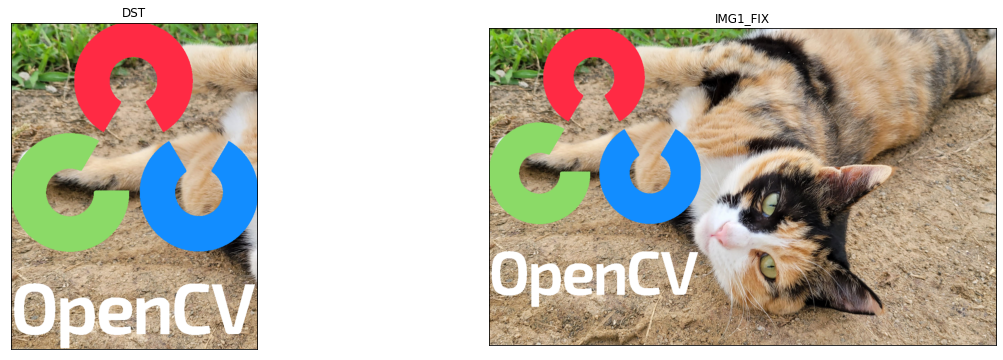

In [17]:
# ROI에 로고를 넣고 메인 이미지를 수정
# ROI에 로고를 넣는 연산
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

# pltImage(dst)
# pltImage(img1)

# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것 (10, 5)
plt.rcParams["figure.figsize"] = (20, 6)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
plt.subplot(121), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('DST'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title('IMG1_FIX'), plt.xticks([]), plt.yticks([])

plt.show()

In [18]:
cv2.imshow('result',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1